In [2]:
import pandas as pd
import requests
from config import api_key
from citipy import citipy
import numpy as np
from matplotlib import pyplot as plt

url="http://api.openweathermap.org/data/2.5/weather?"

In [3]:
cities=[]

lats=np.random.uniform(high=-90, low=90, size=1500)
lons=np.random.uniform(high=-180, low=180, size=1500)
lats_lons=zip(lats,lons)
for value in lats_lons:
    city=citipy.nearest_city(value[0],value[1]).city_name
    if city not in cities:
        cities.append(city)
        
len(cities)

623

In [4]:
r=requests.get(url=url, params={
    "q": "London",
    "appid":api_key
    }).json()

In [5]:
r

{'coord': {'lon': -0.13, 'lat': 51.51},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 285.76,
  'feels_like': 282.41,
  'temp_min': 284.82,
  'temp_max': 286.15,
  'pressure': 995,
  'humidity': 66},
 'visibility': 10000,
 'wind': {'speed': 3.6, 'deg': 190},
 'clouds': {'all': 75},
 'dt': 1600963910,
 'sys': {'type': 1,
  'id': 1414,
  'country': 'GB',
  'sunrise': 1600926619,
  'sunset': 1600970073},
 'timezone': 3600,
 'id': 2643743,
 'name': 'London',
 'cod': 200}

In [6]:
# city_results=[]
units="imperial"

In [7]:
query_url = url + "appid=" + api_key + "&units=" + units+"&q=" 

# query_url=url + params={
#     "q": "London",
#     "appid":api_key
#     }).json()
print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=00adad221a4a334ddbbdcc7652023fdd&units=imperial&q=


In [8]:
num =1
city_name=[]
lat=[]
lon=[]
temp=[]
humidity=[]
cloudiness=[]
wind=[]
for city in cities:

    try:
        data=(requests.get(query_url+ city)).json()
        city_name.append(data["name"])
        lat.append(data["coord"]["lat"])
        lon.append(data["coord"]["lon"])
        temp.append(data["main"]["temp"])
        humidity.append(data["main"]["humidity"])
        cloudiness.append(data["clouds"]["all"])
        wind.append(data["wind"]["speed"])
       
        
        num = num+1
        
    except KeyError:
        
        num= num+1

In [109]:
# city_name
# lat=[]
# lon=[]
# temp=[]
# humidity=[]
# cloudiness=[]
# wind=[]

df=pd.DataFrame({
    "City": city_name,
    "lat": lat,
    "lon": lon,
    "temp_F": temp,
    "humidity": humidity,
    "cloudiness": cloudiness,
    "wind_mph": wind
})
df=df.head(500)
df

,City,lat,lon,temp_F,humidity,cloudiness,wind_mph
0,Hilo,19.73,-155.09,70.39,88,90,3.36
1,Partizanskoye,55.50,94.39,45.41,91,100,3.71
2,Krasnosel'kup,65.70,82.47,38.71,85,58,8.30
3,Zaoyang,32.13,112.75,69.55,72,100,5.68
4,Carnarvon,-24.87,113.63,68.00,88,40,8.05
...,...,...,...,...,...,...,...
495,Roseburg,43.22,-123.34,58.10,87,1,3.36
496,Kutum,14.20,24.67,101.70,17,99,13.60
497,Gijang,35.24,129.21,69.80,56,97,12.75
498,Steamboat Springs,40.48,-106.83,55.09,40,41,4.00


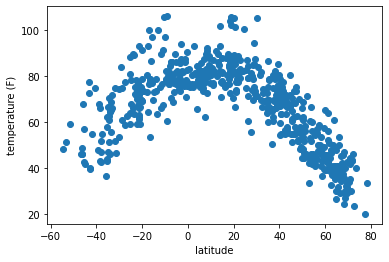

In [110]:
plt.scatter(lat, temp)
plt.xlabel("latitude")
plt.ylabel("temperature (F)")
plt.show()

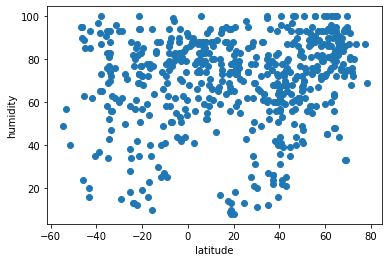

In [111]:
plt.scatter(lat, humidity)
plt.xlabel("latitude")
plt.ylabel("humidity")
plt.show()

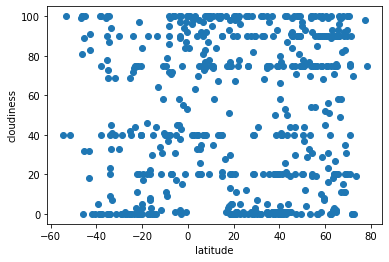

In [112]:
plt.scatter(lat, cloudiness)
plt.xlabel("latitude")
plt.ylabel("cloudiness")
plt.show()

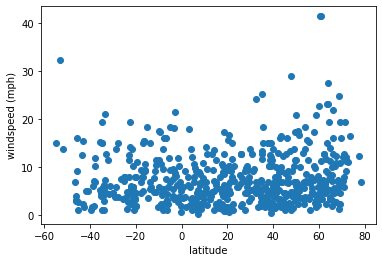

In [113]:
plt.scatter(lat, wind)
plt.xlabel("latitude")
plt.ylabel("windspeed (mph)")
plt.show()

In [114]:
bins=(-100,0,100)
labels="southern_hem", "northern_hem"
df_split=pd.cut(df["lat"],bins, labels=labels).to_frame().rename(columns={"lat": "hemisphere"})

In [115]:
df_hem=pd.DataFrame.merge(df, df_split, left_index=True, right_index=True)

In [116]:
grouped = df.groupby(df_hem.hemisphere)

northern_hem = grouped.get_group("northern_hem")
southern_hem = grouped.get_group("southern_hem")


In [117]:
northern_hem.head()

,City,lat,lon,temp_F,humidity,cloudiness,wind_mph
0,Hilo,19.73,-155.09,70.39,88,90,3.36
1,Partizanskoye,55.50,94.39,45.41,91,100,3.71
2,Krasnosel'kup,65.70,82.47,38.71,85,58,8.30
3,Zaoyang,32.13,112.75,69.55,72,100,5.68
5,Upernavik,72.79,-56.15,23.59,80,0,11.16


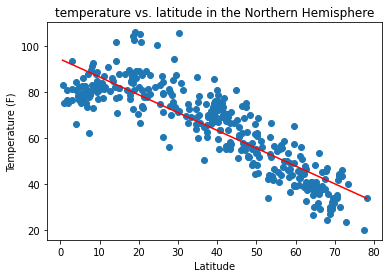

In [118]:
plt.scatter(northern_hem["lat"],northern_hem["temp_F"])
plt.title("temperature vs. latitude in the Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
coeff=np.polyfit(northern_hem["lat"],northern_hem["temp_F"],1)
m=coeff[0]
b=coeff[1]
l_trend=np.arange(min(northern_hem.lat),max(northern_hem.lat),.1)
t_trend=m*l_trend+b
plt.plot(l_trend,t_trend,"r-")
plt.show()

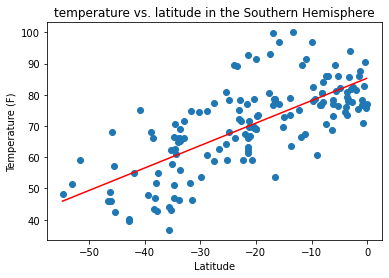

In [119]:
plt.scatter(southern_hem["lat"],southern_hem["temp_F"])
plt.title("temperature vs. latitude in the Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
coeff=np.polyfit(southern_hem["lat"],southern_hem["temp_F"],1)
m=coeff[0]
b=coeff[1]
l_trend=np.arange(min(southern_hem.lat),max(southern_hem.lat),.1)
t_trend=m*l_trend+b
plt.plot(l_trend,t_trend,"r-")
plt.show()

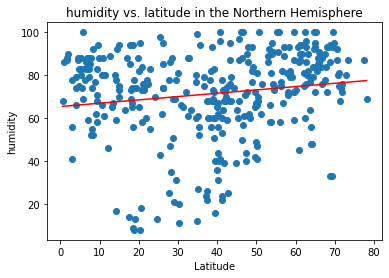

In [120]:
plt.scatter(northern_hem["lat"],northern_hem["humidity"])
plt.title("humidity vs. latitude in the Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("humidity")
coeff=np.polyfit(northern_hem["lat"],northern_hem["humidity"],1)
m=coeff[0]
b=coeff[1]
l_trend=np.arange(min(northern_hem.lat),max(northern_hem.lat),.1)
t_trend=m*l_trend+b
plt.plot(l_trend,t_trend,"r-")
plt.show()

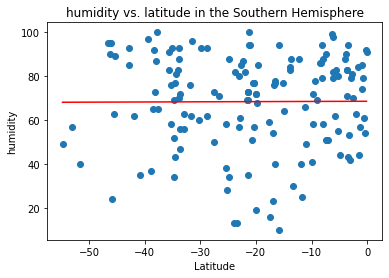

In [121]:
plt.scatter(southern_hem["lat"],southern_hem["humidity"])
plt.title("humidity vs. latitude in the Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("humidity")
coeff=np.polyfit(southern_hem["lat"],southern_hem["humidity"],1)
m=coeff[0]
b=coeff[1]
l_trend=np.arange(min(southern_hem.lat),max(southern_hem.lat),.1)
t_trend=m*l_trend+b
plt.plot(l_trend,t_trend,"r-")
plt.show()

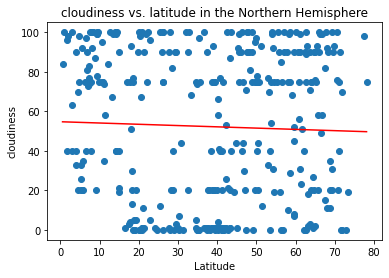

In [122]:
plt.scatter(northern_hem["lat"],northern_hem["cloudiness"])
plt.title("cloudiness vs. latitude in the Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("cloudiness")
coeff=np.polyfit(northern_hem["lat"],northern_hem["cloudiness"],1)
m=coeff[0]
b=coeff[1]
l_trend=np.arange(min(northern_hem.lat),max(northern_hem.lat),.1)
t_trend=m*l_trend+b
plt.plot(l_trend,t_trend,"r-")
plt.show()

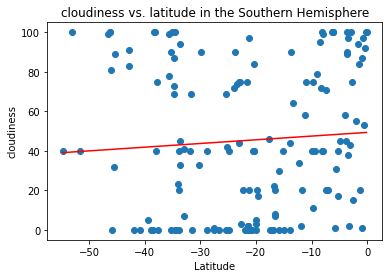

In [123]:
plt.scatter(southern_hem["lat"],southern_hem["cloudiness"])
plt.title("cloudiness vs. latitude in the Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("cloudiness")
coeff=np.polyfit(southern_hem["lat"],southern_hem["cloudiness"],1)
m=coeff[0]
b=coeff[1]
l_trend=np.arange(min(southern_hem.lat),max(southern_hem.lat),.1)
t_trend=m*l_trend+b
plt.plot(l_trend,t_trend,"r-")
plt.show()

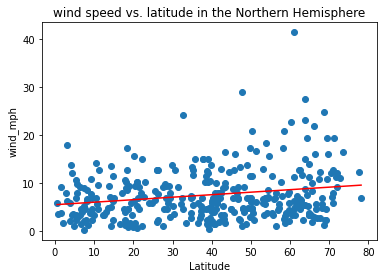

In [124]:
plt.scatter(northern_hem["lat"],northern_hem["wind_mph"])
plt.title("wind speed vs. latitude in the Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("wind_mph")
coeff=np.polyfit(northern_hem["lat"],northern_hem["wind_mph"],1)
m=coeff[0]
b=coeff[1]
l_trend=np.arange(min(northern_hem.lat),max(northern_hem.lat),.1)
t_trend=m*l_trend+b
plt.plot(l_trend,t_trend,"r-")
plt.show()

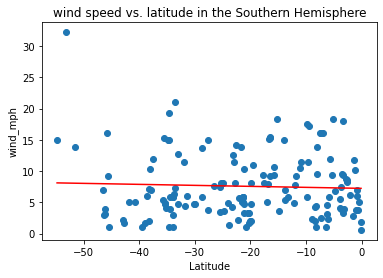

In [125]:
plt.scatter(southern_hem["lat"],southern_hem["wind_mph"])
plt.title("wind speed vs. latitude in the Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("wind_mph")
coeff=np.polyfit(southern_hem["lat"],southern_hem["wind_mph"],1)
m=coeff[0]
b=coeff[1]
l_trend=np.arange(min(southern_hem.lat),max(southern_hem.lat),.1)
t_trend=m*l_trend+b
plt.plot(l_trend,t_trend,"r-")
plt.show()

In [126]:
df_hem.to_csv("weather_data.csv")